#### **This is a case study as part of the Capstone Project of the [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics?) course by Coursera**

All the details regaring the case study are provided in the README.md file.

In [1]:
library(tidyverse) # metapackage of all tidyverse packages

list.files(path = "../input")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "july-trip-data" "trip-data"

## **ASK** 

**Guiding Questions**

* **What is the problem you are trying to solve?** 

The main problem that we are trying to solve here is digging deep into the provided dataset and find out ways to influence the casual riders to buy annual memberships.
* **How can your insights drive business decisions?**

The insights provided in this case study would help the company to design marketing strategies so as to increase the number of member riders.


**Questions to be answered further down this case study**

* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?

## **PREPARE**

**Dataset**

The dataset used here is provided by Google in their Data Analytics Professional Certification Course by Coursera.
You can access the dataset by [clicking here](http://https://divvy-tripdata.s3.amazonaws.com/index.html)

**Preparing the data to be used**

* Download the dataset.(I downloaded the dataset of the month of July from the given link)
* Extract the file from the .zip folder
* Imported the dataset onto your coding platform(RStudio Cloud / Kaggle)
* Since it is in .csv format, it is easily executable in the platform


**Guiding questions**
* **Where is your data located?**

You can access the dataset from [here](http://https://divvy-tripdata.s3.amazonaws.com/index.html).
I have also uploaded the dataset that I used.

* **How is the data organized?** 

The datasets are provided on a monthly basis in its own seperate .csv file. I used the dataset from the month of July.

* **Are there issues with bias or credibility in this data?**  

This is anonymous user data that is directly shared by the company. So, there is no issues regarding bias or credibility.  
* **How are you addressing licensing, privacy, security, and accessibility?**

Since the data does not share any private user information, there should not be any issue regarding privacy. And since it is an open-source dataset, it is easily accessible and there is no problem regarding licensing.

* **How did you verify the data’s integrity?** 

The dataset has correctly specified filled columns and rows.

* **How does it help you answer your question?** 

This dataset helps in the descriptive analysis of the membership of the riders using historic data.

* **Are there any problems with the data?**

The dataset will be checked for outliers. If found, they will be removed and the cleaned dataset will be used.

In [2]:
library(readr)
cycle_trip <- read_csv("../input/july-trip-data/202107-divvy-tripdata.csv") #Importing the dataset



── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)




In [3]:
head(cycle_trip) #Viewing the columns that are available for analysis

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.88398,-87.62468,41.89937,-87.64848,casual
B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.90036,-87.69670,41.88990,-87.67147,casual
6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.86038,-87.62581,41.89017,-87.62619,member
379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.90036,-87.69670,41.89456,-87.65345,member
6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.90035,-87.69668,41.88659,-87.65839,casual
62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.90033,-87.69674,41.91389,-87.70513,casual


## **PROCESS**

**Main Tasks**

* Create a column to store the ride time of each ride in minutes
* Create another column to store the weekday on which the ride has been completed
* Check for duplicate datapoints
* Summarize the dataset after adding the new columns
* Check for outliners, remove them if found.
* Move to Analyze phase


In [4]:
#Calculating the ride time for each rider in minutes and storing them in a new column named ride_time_m

cycle_trip <- cycle_trip %>%
mutate(ride_time_m = as.numeric(cycle_trip$ended_at - cycle_trip$started_at) / 60)

summary(cycle_trip$ride_time_m)


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   -0.20     7.58    13.35    24.21    23.73 49107.15 

In [5]:
# Adding a column to store the weekday of each of the rides. This might be useful during the analysis process

cycle_trip <- cycle_trip %>%
    mutate(weekday = paste(strftime(cycle_trip$ended_at, "%u"), "-", strftime(cycle_trip$ended_at, "%a")))
unique(cycle_trip$weekday)

[1] "5 - Fri" "3 - Wed" "7 - Sun" "4 - Thu" "6 - Sat" "1 - Mon" "2 - Tue"

In [6]:
summary(cycle_trip$ride_time_m)


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   -0.20     7.58    13.35    24.21    23.73 49107.15 

*The Min is less than zero. That means there is some discripancy in the dataset. The max is also extremely high. There can be multiple reasons for such errors, so we would leave these datapoints out of our analysis so as to minimize error.*

In [7]:
#Checking the range which can be used for our analysis

distribution = quantile(cycle_trip$ride_time_m, seq(0, 1, by=0.02))
distribution

0%           2%           4%           6%           8%          10% 
   -0.200000     1.483333     2.633333     3.350000     3.916667     4.416667 
         12%          14%          16%          18%          20%          22% 
    4.883333     5.333333     5.766667     6.166667     6.566667     6.983333 
         24%          26%          28%          30%          32%          34% 
    7.383333     7.783333     8.200000     8.616667     9.033333     9.466667 
         36%          38%          40%          42%          44%          46% 
    9.900000    10.350000    10.800000    11.283333    11.766667    12.266667 
         48%          50%          52%          54%          56%          58% 
   12.800000    13.350000    13.916667    14.516667    15.150000    15.816667 
         60%          62%          64%          66%          68%          70% 
   16.516667    17.266667    18.066667    18.933333    19.850000    20.833333 
         72%          74%          76%          78%          80%          82% 
   21.916667    23.116667    24.416667    25.850000    27.433333    29.233333 
         84%          86%          88%          90%          92%          94% 
   31.316667    33.866667    37.066667    41.150000    46.766667    55.850000 
         96%          98%         100% 
   71.116667   102.750000 49107.150000

**Observation**

It can be observed that the outliners mainly exist in datapoints < 2% and datapoints > 98%.

So, we are going to work with the remaining dataset

In [8]:
#Removing the outliners

cycle_trip_clean <- cycle_trip %>% 
    filter(ride_time_m > as.numeric(distribution['2%'])) %>%
    filter(ride_time_m < as.numeric(distribution['98%']))

print(paste("Removed", nrow(cycle_trip) - nrow(cycle_trip_clean), "rows as outliners, using the rest of the datapoints for analysis" ))

[1] "Removed 33007 rows as outliners, using the rest of the datapoints for analysis"


In [9]:
#Summarizing to check if there is any more discripancy

summary(cycle_trip_clean)

   ride_id          rideable_type        started_at                 
 Length:789403      Length:789403      Min.   :2021-07-01 00:00:22  
 Class :character   Class :character   1st Qu.:2021-07-08 18:10:53  
 Mode  :character   Mode  :character   Median :2021-07-17 14:01:56  
                                       Mean   :2021-07-16 22:46:48  
                                       3rd Qu.:2021-07-24 18:25:35  
                                       Max.   :2021-07-31 23:59:58  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-07-01 00:04:51   Length:789403      Length:789403     
 1st Qu.:2021-07-08 18:26:42   Class :character   Class :character  
 Median :2021-07-17 14:25:55   Mode  :character   Mode  :character  
 Mean   :2021-07-16 23:05:09                                        
 3rd Qu.:2021-07-24 18:43:47                                        
 Max.   :2021-08-01 01:10:27      

**Guiding questions** 

* **What tools are you choosing and why?** 

I am using R. Since it is a large dataset, using R makes the process easier.

* **Have you ensured your data’s integrity?** 

Yes, data is consistent

* **What steps have you taken to ensure that your data is clean?** 

Duplicates have been removed and outliners have been excluded from the data so as to get promising results.

* **How can you verify that your data is clean and ready to analyze?**

It has been done here.

* **Have you documented your cleaning process so you can review and share those results?**

Yes

Now, since we have cleaned the dataset and removed the outliners, we can move to the Analyse phase so as to find out the different relations between the datapoints. This would help us in a data-driven decision making process that needs to be presented.

## **ANALYZE**

In this step, we will try to analyse the data which would help us in our data driven decision making.

**Steps to follow:**

* Analyze the summary of the dataset
* Find out the Member vs Casual riders
* Find the number of Member vs Casual riders with respect to other parameters, such as day of the week or bike type
* Find the percent difference in the cases
* Analyze the factors that might be influencing the difference in numbers
* Proceed to the next stage of the data analysis process to share the findings to your stakeholder

**1. Casual vs Member Riders Distribution**

In [10]:
cycle_trip_clean%>% 
    group_by(member_casual) %>% 
    summarise(count = length(ride_id),
              '%' = (length(ride_id) / nrow(cycle_trip_clean)) * 100)

member_casual,count,%
<chr>,<int>,<dbl>
casual,418811,53.05414
member,370592,46.94586


**2. Member vs Casual Rider distribution with respect to weekdays**

In [11]:
cycle_trip_clean %>%
    group_by(weekday) %>% 
    summarise(count = length(ride_id),
              '%' = (length(ride_id) / nrow(cycle_trip_clean)) * 100,
              'member_num'= (sum(member_casual == "member")),
              'casual_num'= (sum(member_casual == "casual")),
              'member_perc' = (sum(member_casual == "member") / length(ride_id)) * 100,
              'casual_perc' = (sum(member_casual == "casual") / length(ride_id)) * 100,
              'Member - Casual Percent Difference' = member_perc - casual_perc)

weekday,count,%,member_num,casual_num,member_perc,casual_perc,Member - Casual Percent Difference
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1 - Mon,91116,11.54239,45320,45796,49.73879,50.26121,-0.522411
2 - Tue,94313,11.94738,51120,43193,54.20250,45.79750,8.404992
3 - Wed,96827,12.26585,52322,44505,54.03658,45.96342,8.073161
4 - Thu,116989,14.81993,62789,54200,53.67086,46.32914,7.341716
5 - Fri,130399,16.51869,62391,68008,47.84623,52.15377,-4.307548
6 - Sat,154813,19.61140,57834,96979,37.35733,62.64267,-25.285344
7 - Sun,104946,13.29435,38816,66130,36.98664,63.01336,-26.026719


**3. Use of different types of rides**

In [12]:
cycle_trip_clean %>% 
    group_by(rideable_type) %>% 
    summarise(count = length(ride_id),
              '%' = (length(ride_id) / nrow(cycle_trip_clean)) * 100)

rideable_type,count,%
<chr>,<int>,<dbl>
classic_bike,490089,62.083499
docked_bike,50954,6.454751
electric_bike,248360,31.461750


**4. Casual vs Member distribution based on type of ride**

In [13]:
cycle_trip_clean %>%
    group_by(rideable_type) %>% 
    summarise(count = length(ride_id),
          '%' = (length(ride_id) / nrow(cycle_trip_clean)) * 100,
          'members_n'= (sum(member_casual == "member")),
          'casuals_n'= (sum(member_casual == "casual")),
          'members_p'= (sum(member_casual == "member") / length(ride_id)) * 100,
          'casual_p' = (sum(member_casual == "casual") / length(ride_id)) * 100,
          'member_casual_percent_difference' = members_p - casual_p)

rideable_type,count,%,members_n,casuals_n,members_p,casual_p,member_casual_percent_difference
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
classic_bike,490089,62.083499,259242,230847,52.89692,47.10308,5.793846
docked_bike,50954,6.454751,0,50954,0.00000,100.00000,-100.000000
electric_bike,248360,31.461750,111350,137010,44.83411,55.16589,-10.331776


**5. Distribution of Riding time for Casual vs Member Riders**

In [14]:
cycle_trip_clean %>%
    group_by(member_casual) %>% 
    summarise(count = length(ride_id),
          '%' = (length(ride_id) / nrow(cycle_trip_clean)) * 100,
          'ridetime'= (mean(ride_time_m)))
          

member_casual,count,%,ridetime
<chr>,<int>,<dbl>,<dbl>
casual,418811,53.05414,22.42893
member,370592,46.94586,13.76188


**6. Distribution of member vs Casual rider ride times based on type of bikes used**

In [15]:
cycle_trip_clean %>%
    group_by(rideable_type) %>% 
    summarise(count = length(ride_id),
          'Percent of users' = (length(ride_id) / nrow(cycle_trip_clean)) * 100,
           'member_n'= (sum(member_casual == "member")),
           'casual_n'= (sum(member_casual == "casual")),   
           'ridetime'= (mean(ride_time_m)),
           'Member - Casual Percent Difference' = ((member_n - casual_n) / length(ride_id))*100)
          

rideable_type,count,Percent of users,member_n,casual_n,ridetime,Member - Casual Percent Difference
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
classic_bike,490089,62.083499,259242,230847,17.55013,5.793846
docked_bike,50954,6.454751,0,50954,32.76930,-100.000000
electric_bike,248360,31.461750,111350,137010,17.00223,-10.331776


**Guiding questions **

* **How should you organize your data to perform analysis on it?** 
  
  We have already processed the data. Now we need to find out the different relations among the different parameters provided in the dataset

* **Has your data been properly formatted?**
  
  Yes

* **What surprises did you discover in the data?**

  Docked type bikes were not used by members at all
  
* **What trends or relationships did you find in the data?**

  * The Member vs Casual Riders vary based on the day of the week.
  * Casual riders used the bikes for a longer period of time on an average
  * Docked type were used by casual riders the most. 
  * The average ride time of classic and electric bikes were almost similar in case of both casual and member riders
  
  
* **How will these insights help answer your business questions?**

  These will now help in tweaking the business and marketing strategies so as to convert the current casual riders into members

## **SHARE**

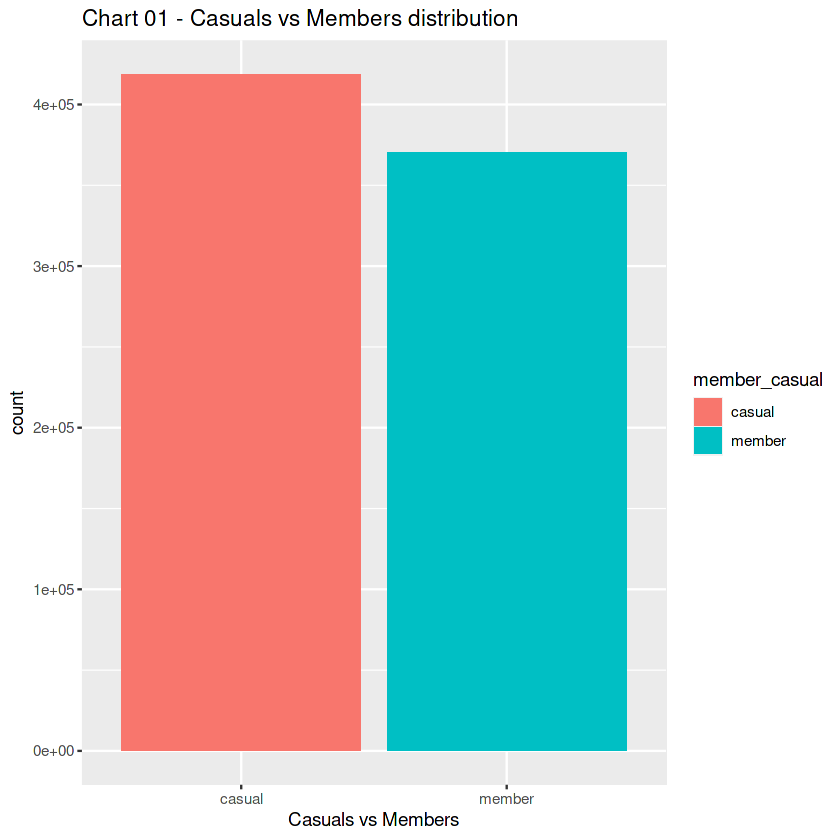

In [16]:
ggplot(cycle_trip_clean, aes(member_casual, fill=member_casual)) +
    geom_bar() +
    labs(x="Casuals vs Members", title="Chart 01 - Casuals vs Members distribution")

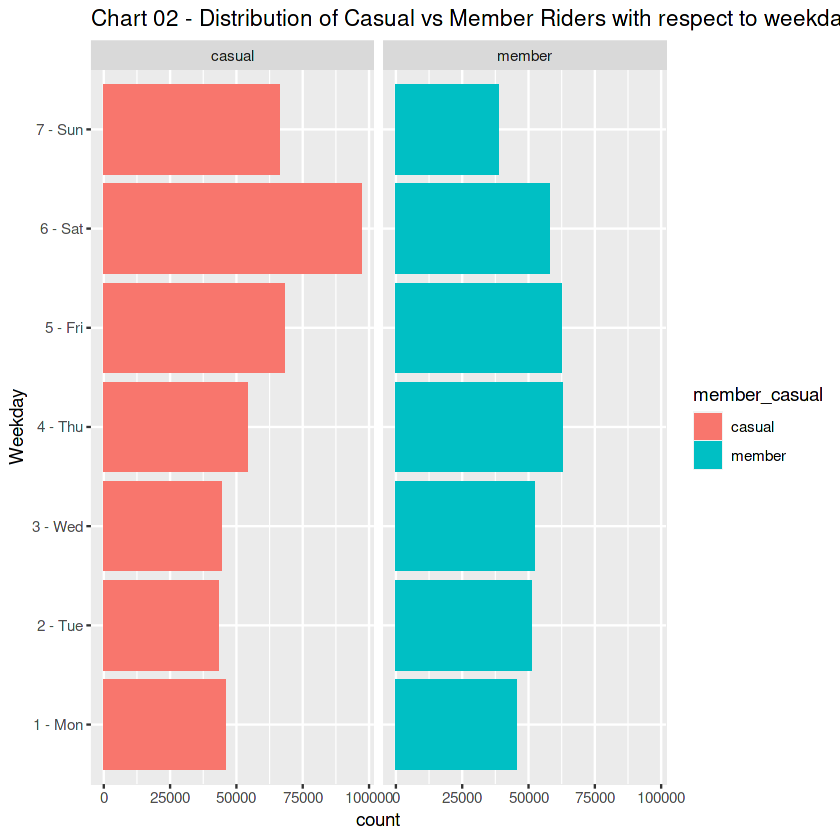

In [17]:
ggplot(cycle_trip_clean, aes(weekday, fill=member_casual)) +
    geom_bar() +
    labs(x="Weekday", title="Chart 02 - Distribution of Casual vs Member Riders with respect to weekdays")+
facet_wrap(~member_casual)+
coord_flip()

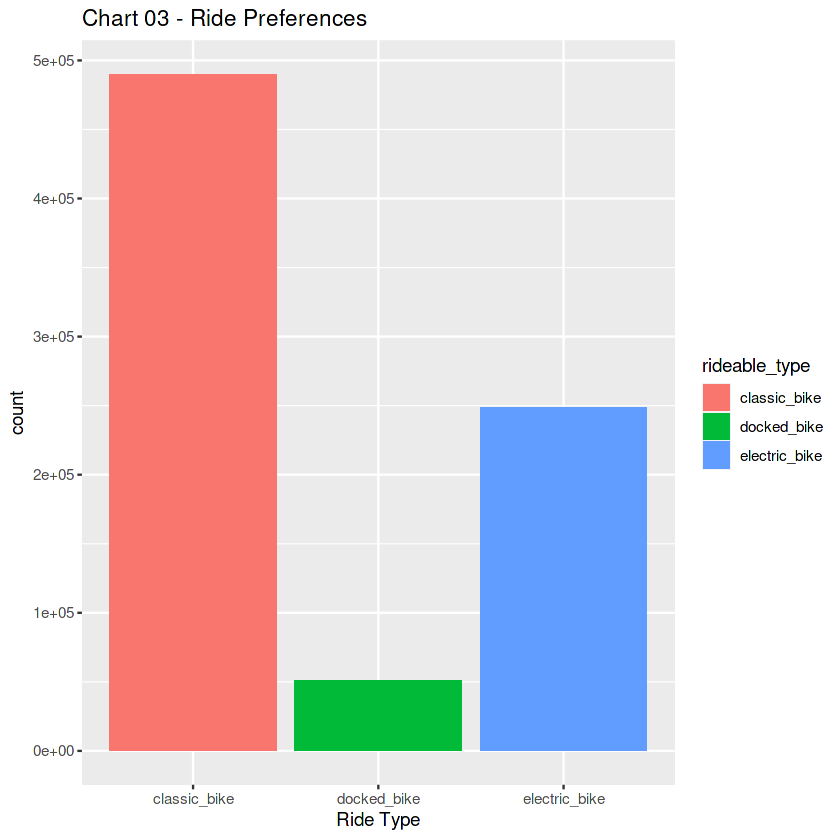

In [18]:
ggplot(cycle_trip_clean, aes(rideable_type, fill=rideable_type)) +
    geom_bar() +
    labs(x="Ride Type", title="Chart 03 - Ride Preferences")

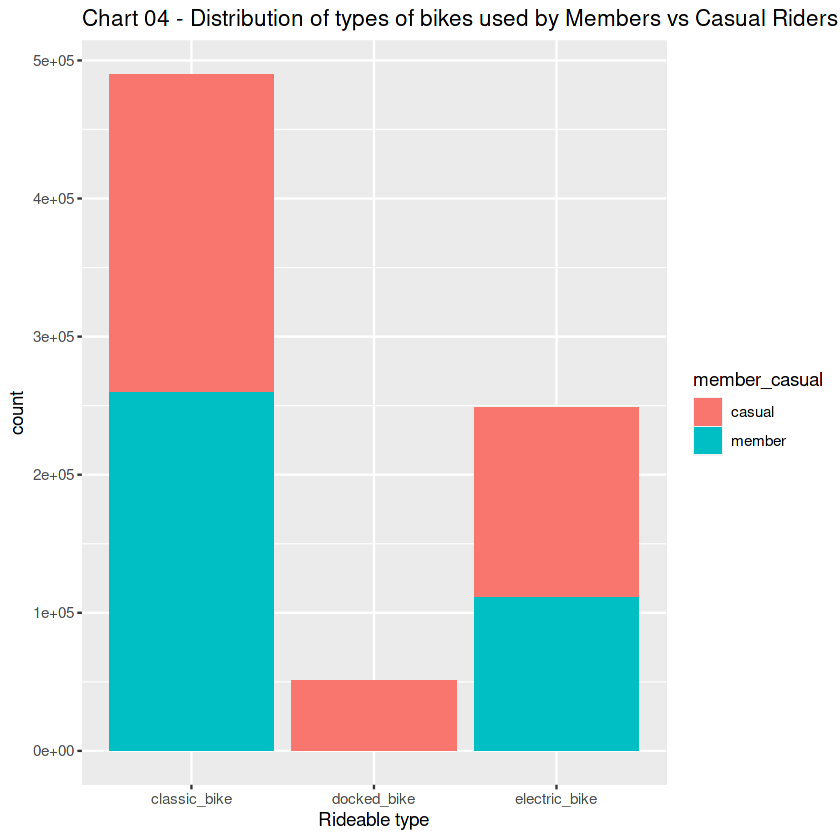

In [19]:
ggplot(cycle_trip_clean, aes(rideable_type, fill=member_casual)) +
    labs(x="Rideable type", title="Chart 04 - Distribution of types of bikes used by Members vs Casual Riders") +
    geom_bar()

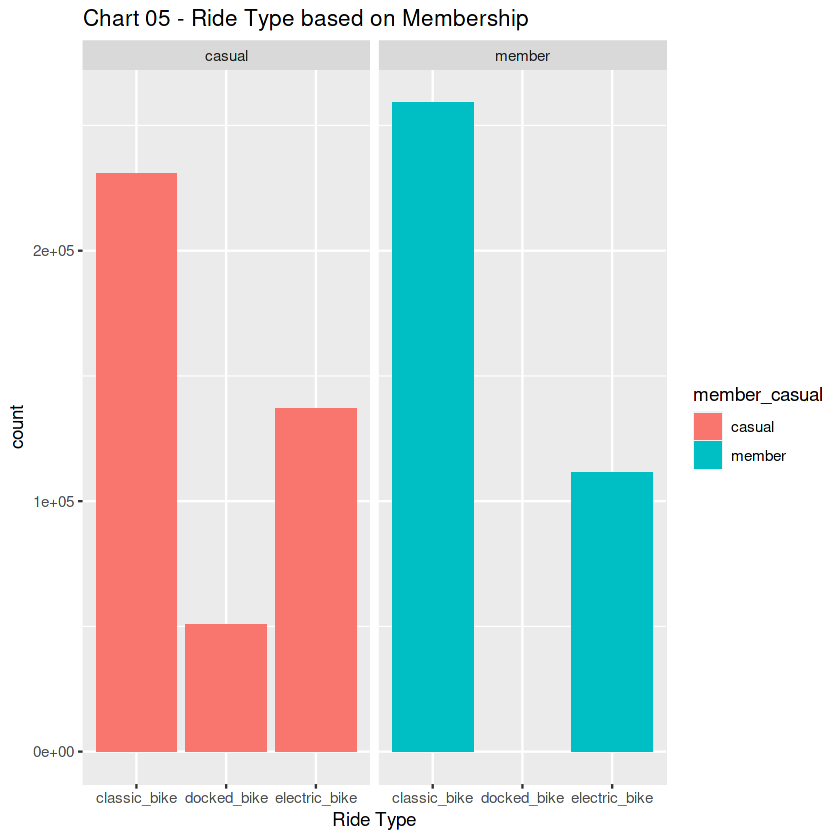

In [20]:
cycle_trip_clean %>%
    ggplot(aes(rideable_type, fill=member_casual)) +
    geom_bar() +
    labs(x="Ride Type", title="Chart 05 - Ride Type based on Membership ") +
    facet_wrap(~ member_casual)

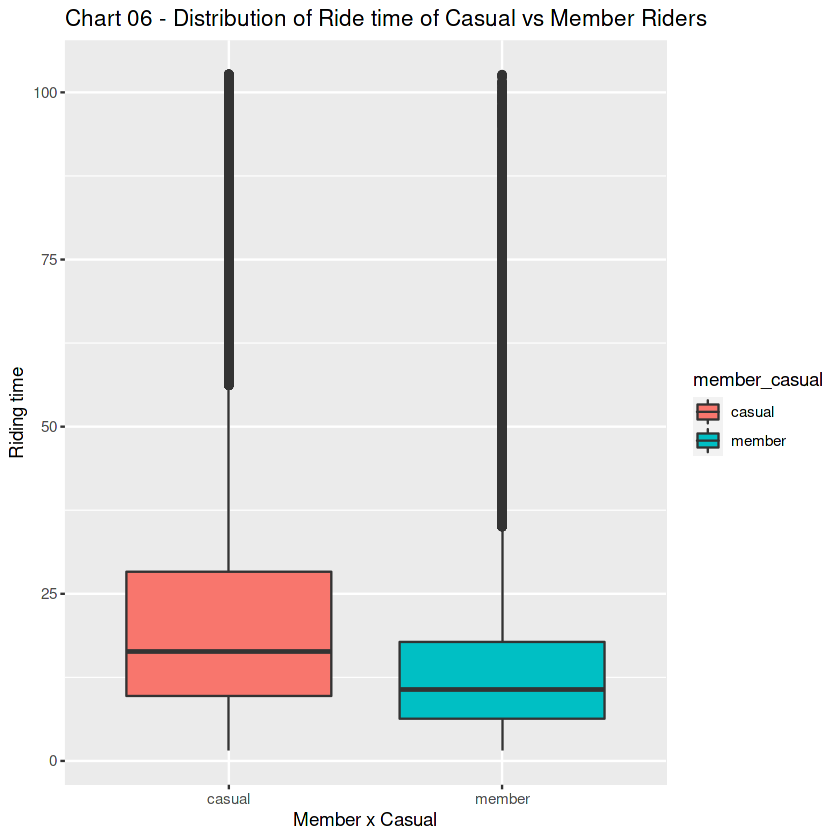

In [21]:
ggplot(cycle_trip_clean, aes(x=member_casual, y=ride_time_m, fill=member_casual)) +
    labs(x="Member x Casual", y="Riding time", title="Chart 06 - Distribution of Ride time of Casual vs Member Riders") +
    geom_boxplot()

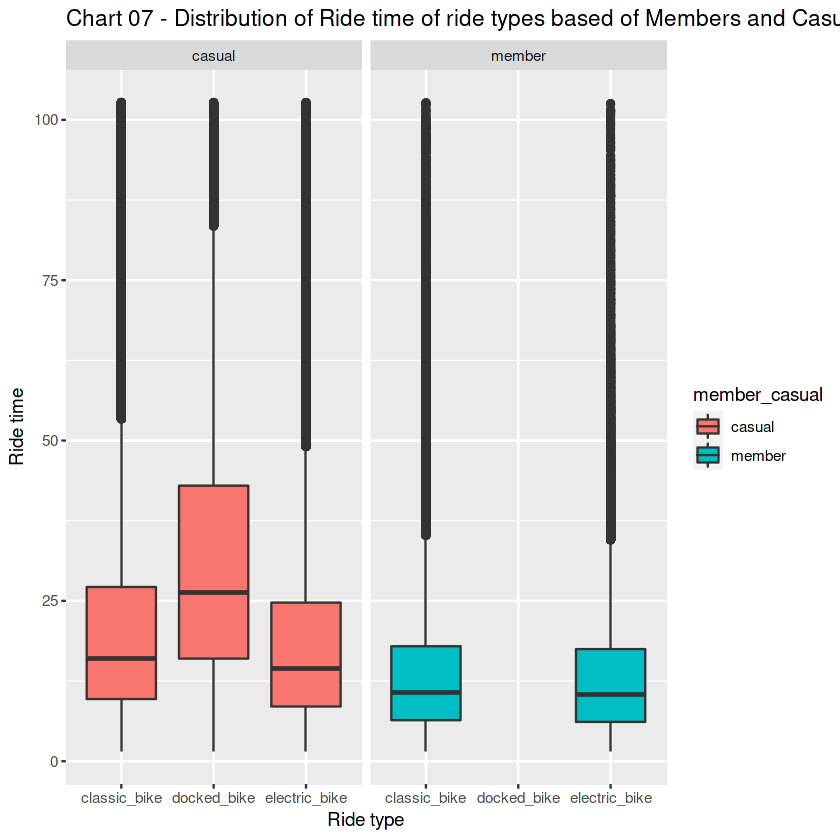

In [22]:
ggplot(cycle_trip_clean, aes(x=rideable_type, y=ride_time_m, fill=member_casual)) +
    geom_boxplot() +
    facet_wrap(~ member_casual) +
    labs(x="Ride type", y="Ride time", title="Chart 07 - Distribution of Ride time of ride types based of Members and Casual Riders") 

#### **Findings from the analysis**

* There are significantly **more number of casual riders than there are riders with memberships**
* The bikes are extensively used by casual riders during the **weekends**
* The average use by members remain almost similar during the weekdays and is a bit less during the weekdays
* Docked bikes were used only by casual riders
* **Member** riders comprised of **53%** of the classic bike riders
* **Casual** riders comprised of **55%** of the electric bike riders
* **Casual** riders used the bikes for **longer periods** of time than the member riders, average of 22 minutes
* The docked type bikes had the most ride time to their name in case of casual riders, average of 32 minutes

**Guiding questions**

* **Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?** 
  
  Yes, there are many different variables that are playing a key role in this.

* **What story does your data tell?**

  It shows how Casual riders differ from the member rider based on variables like weekdays, ride time, etc.
  
* **How do your findings relate to your original question?** 
  
  It does help in finding out ways in which the casual rider could be provoked to take up memberships
  
* **Who is your audience? What is the best way to communicate with them?** 
  
  Lily Moreno, Cyclistic Marketing Analytics team, Cyclistic Executive team. The best way to communicate the results is a live presentation.
  
* **Can data visualization help you share your findings?** 

  Abbsolutely, a detailed presentation woul highlight all the key points.
  
* **Is your presentation accessible to your audience?**

  Yes.

## **ACT**

#### **Proposals to the team**

**Rental Price Proposals**

* Since the casual riders use the service much more during the weekends, the rental price for **non-membership accounts** should be kept **higher**.
* Add **special discounts** and coupons/cashbacks for memberships during the weekends.
* If all the prices for casual members are increased, Cyclistic might start loosing customers. So, specific ride types should have an increased rental price. Since docked type bikes are the most used bikes by casual riders, the rental price of these bikes should be increased. **The price of the casual and electric bikes should be kept at par, although some benifits must be given to the members**
* The electric bikes are used more by casual riders. This might mean, they usually use it for work or as a faster means of transport rather than classic bikes. Thus, **increase the number of benifits for member users using the electric bikes**, like cashback rewards which can be retrived during subsequent rides. Such facilities might attract the casual riders to opt for memberships which would be benificial in the long run
* The rental charges should **prioritize the ride time**, since the casual riders use them for a longer period of time during their rides. Slightly reduce the prices for the members which would multiply to become big differences in case of longer rides

**Marketing team campaigns**

* Start ad campaigns to educate why **Cyclistic** is trying to bring this green revolution in the community and how using these rides help in making the air cleaner and pollution free
* Start providing **membership only perks** like free energy drinks at the docking stations
* **Publicize the new set rental charges** and how a membership would be a long term benifit for whoever uses the service


**Guiding questions**

* **What is your final conclusion based on your analysis?** 
  
  They have been listed above
  
* **What next steps would you or your stakeholders take based on your findings?** 

  They need implement these ideas at a small scale and see the changes against a control group. If the advertisements are successful, they can publiicize on a larger scale
  
* **Is there additional data you could use to expand on your findings?**

  * Information about the users
  * Climate data, and how it affects the rides

## **CONCLUSION**

This case study has been done keeping in mind all the steps taught in the [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics?) course by Coursera. This not only helped me understand the use of different languages, but it also helped me view all these through a business point of view. 